In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

In [7]:
data = pd.read_csv("../datasets/world-happiness-report-2017.csv")
data.head(10) # 查看前十条数据

,Country,Happiness.Rank,Happiness.Score,Whisker.high,Whisker.low,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual
0,Norway,1,7.537,7.594445,7.479556,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027
1,Denmark,2,7.522,7.581728,7.462272,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707
2,Iceland,3,7.504,7.622030,7.385970,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715
3,Switzerland,4,7.494,7.561772,7.426227,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716
4,Finland,5,7.469,7.527542,7.410458,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182
5,Netherlands,6,7.377,7.427426,7.326574,1.503945,1.428939,0.810696,0.585384,0.470490,0.282662,2.294804
6,Canada,7,7.316,7.384403,7.247597,1.479204,1.481349,0.834558,0.611101,0.435540,0.287372,2.187264
7,New Zealand,8,7.314,7.379510,7.248490,1.405706,1.548195,0.816760,0.614062,0.500005,0.382817,2.046456
8,Sweden,9,7.284,7.344095,7.223905,1.494387,1.478162,0.830875,0.612924,0.385399,0.384399,2.097538
9,Australia,10,7.284,7.356651,7.211349,1.484415,1.510042,0.843887,0.601607,0.477699,0.301184,2.065211


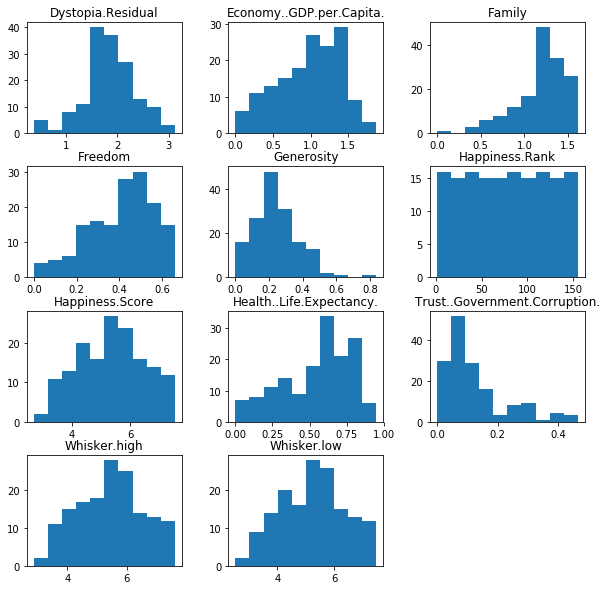

In [8]:
histohrams = data.hist(grid=False, figsize=(10, 10)) # 查看数据分布

In [12]:
# 分割训练数据和测试数据
train_data = data.sample(frac=0.8)
test_data = data.drop(train_data.index)

# 这里选择一列标准来处理
input_param_names = ['Economy..GDP.per.Capita.', 
                    'Whisker.high', 
                    'Whisker.low', 
                    'Family', 
                    'Health..Life.Expectancy.', 
                    'Freedom', 
                    'Generosity', 
                    'Trust..Government.Corruption.', 
                    'Dystopia.Residual'] # 特征列
output_param_name = 'Happiness.Score' # 标签

origin_x = train_data[input_param_names].values
origin_y = train_data[[output_param_name]].values.T

test_x = test_data[input_param_names].values
test_y = test_data[[output_param_name]].values.T

print('origin_x.shape' + str(origin_x.shape))
print('origin_y.shape' + str(origin_y.shape))

origin_x.shape(124, 9)
origin_y.shape(1, 124)


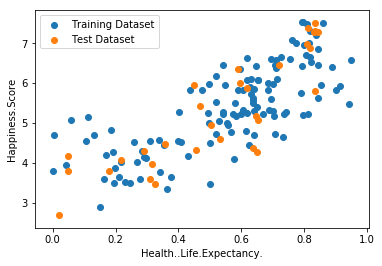

In [13]:
# 绘制数据，展示数据
# plt 图形绘制
def hit_params(input_param_name: str, output_param_name: str):    
    plt.scatter(train_data[[input_param_name]].values, train_data[[output_param_name]].values.T, label='Training Dataset')
    plt.scatter(test_data[[input_param_name]].values, test_data[[output_param_name]].values.T, label='Test Dataset')
    plt.xlabel(input_param_name)
    plt.ylabel(output_param_name)
    plt.legend()
    plt.show()
hit_params('Health..Life.Expectancy.', output_param_name)

In [14]:
# 准备函数
def sigmoid(z):
    s = 1 / (1 + np.exp(-z))
    return s

def initialize_with_zeros(dim: int):
    w = np.zeros((dim, 1))
    b = 0
    assert(w.shape == (dim, 1))
    return w, b

def propagate(w, b, X, Y):
    m = Y.shape[1]
    A = np.dot(w.T, X) + b # yhat
    cost = 1 / m * np.sum((A-Y)*(A-Y))
    dw = 1 / m * np.dot(X, (A-Y).T) # 获得偏导数
    db = 1 / m * np.sum(A-Y) # d 的偏移量
    grads = {
        'dw': dw,
        'db': db
    }
    return (grads, cost)

def optimize(w, b, X, Y, num_iterations, learning_rate, print_cost=True):
    costs = []
    for i in range(num_iterations):
        grads, cost = propagate(w, b, X, Y)
        dw = grads['dw']
        db = grads['db']
        w = w - learning_rate * dw
        b = b - learning_rate * db
        if i % int(num_iterations/10) == 0:
            if print_cost:
                print("Cost after iteration %i: %f" %(i, cost))
            costs.append(cost)
        cost = np.squeeze(cost) # 从数组的形状中删除单维度条目，即把shape中为1的维度去掉
    params = {
        'w': w,
        'b': b
    }
    grads = {
        'dw': dw,
        'db': db
    }
    return (params, grads, costs)

def print_cost(costs):
    """ 打印损失函数的变化趋势 """
    plt.plot(costs)
    plt.ylabel('Cost')
    plt.xlabel('num_iterations')
    plt.show()

In [15]:
# 将数据 shape 处理一下
origin_x_flatten = origin_x.reshape(origin_x.shape[0], -1).T
test_x_flatten = test_x.reshape(test_x.shape[0], -1).T
print('将 origin_x 从 ' + str(origin_x.shape) + '处理成' + str(origin_x_flatten.shape))
print('将 test_x 从 ' + str(test_x.shape) + '处理成' + str(test_x_flatten.shape))
print('此时 origin_y.shape ' + str(origin_y.shape))

将 origin_x 从 (124, 9)处理成(9, 124)
将 test_x 从 (31, 9)处理成(9, 31)
此时 origin_y.shape (1, 124)


In [100]:
dim = origin_x_flatten.shape[0]
w, b = initialize_with_zeros(dim)
print('w ' + str(w))
params, grads, costs = optimize(w, b, origin_x_flatten, origin_y, 1000, 0.02)
print('params ' + str(params))
# print_cost(costs=costs)

Cost after iteration 0: 29.071839
Cost after iteration 100: 0.001080
Cost after iteration 200: 0.000611
Cost after iteration 300: 0.000413
Cost after iteration 400: 0.000318
Cost after iteration 500: 0.000264
Cost after iteration 600: 0.000227
Cost after iteration 700: 0.000198
Cost after iteration 800: 0.000175
Cost after iteration 900: 0.000154
params {'w': array([[0.09964897],
       [0.45628995],
       [0.45848399],
       [0.08599857],
       [0.0675117 ],
       [0.05734693],
       [0.04168649],
       [0.02682615],
       [0.07836723]]), 'b': 0.03743456005631919}


In [108]:
def predict(params, test_x):
    w = params['w']
    b = params['b']
    X = test_x
    A = np.dot(w.T, X) + b
    return A

result = predict(params, test_x_flatten)
print('result = ' + str(result))
print('test_y = ' + str(test_y))

result.shape = [[7.49563251 7.47287297 7.28301079 6.95909388 6.61701268 6.5520809
  6.50919166 6.4433984  6.40865313 6.3626144  6.10797509 6.1128796
  5.86153206 5.84063173 5.83477191 5.81915743 5.62844601 5.53222384
  5.46491209 5.30302719 5.25617774 5.2401748  5.25225736 5.11977624
  5.03227051 4.99689751 4.73605379 4.12696125 3.79941609 3.60995514
  3.35350001]]
test_y.shape = [[7.52199984 7.49399996 7.31400013 6.97700024 6.60900021 6.57200003
  6.52699995 6.44199991 6.40299988 6.375      6.10500002 6.09800005
  5.8499999  5.83799982 5.82499981 5.82299995 5.62099981 5.5250001
  5.47200012 5.29300022 5.26200008 5.23500013 5.22700024 5.15100002
  5.04099989 5.00400019 4.71400023 4.11999989 3.79399991 3.59299994
  3.34899998]]
